# Grupo 3
## Alumnos: Eduardo Patinella y Alberto Barrio.
## Tema: De Facebook a Meta
1) Búsqueda de tweets con #Facebook y #Meta 

2) Filtrado y limpiado (eliminar emoticons, hastag, urls) 

3) Utilizar etiquetado POS y lematizacion. Hacer nube de palabras con los adjetivos. 

4) Hacer gráfico de torta con las personas mas mencionadas 

5) Hacer análisis de sentimiento con Polaridad con respecto al Metaverso 

In [3]:
import os
from dotenv import load_dotenv
# Cargar valores del archivo .env en las variables de entorno
load_dotenv()
# Cargar valor del token a variable
bearer_token = os.environ.get("BEARER_TOKEN")

hastag='(#Facebook) (#Meta OR #Metaverse)'
palabras_spam = '-@OriginProtocol -social_samosa -UniverseCrypt -@adgpi -@northerncomd_ia -sanshutoken -btc -buy -blockchain -sale -Clicking -crypto -Offer -bitcoin -#btc -#buy -#blockchain -#sale -#Clicking -#crypto -#Offer -#bitcoin'


url = "https://api.twitter.com/2/tweets/search/recent"
headers = {
    "Authorization": f"Bearer {bearer_token}",
    "User-Agent":"v2FullArchiveSearchPython"
}
params = {
    'query': f'{hastag} -is:retweet {palabras_spam} lang:en', #Va a traer los que tienen el hashtag '#machinelearning' y el -is:retweet es para que no traigra retweets
    'start_time':'2021-10-28T00:00:00.000Z',
    'end_time':'2021-10-29T23:59:00.000Z',
    'max_results':100  #Y que traiga 100 resultados maximo
}


In [4]:
import requests
import pandas as pd

response = requests.get(url, headers=headers, params=params)
print(response)
# Generar excepción si la respuesta no es exitosa
if response.status_code != 200:
    raise Exception(response.status_code, response.text)

def get_data(url,params):
    results = []
    n=0
    while (n<=50):
        print("->",n)
        n=n+1
        response = requests.get(url, headers=headers, params=params)
        # Generar excepción si la respuesta no es exitosa
        if response.status_code != 200:
            raise Exception(response.status_code, response.text)
        data = response.json()['data']
        meta_data = dict(response.json())['meta']
        results.append(pd.json_normalize(data))
        if 'next_token' not in meta_data:
            break
        else:
            token = meta_data['next_token']
            print(token)
            params = {
                'query': f'{hastag} -is:retweet {palabras_spam} lang:en', #Va a traer los que tienen el hashtag '#machinelearning' y el -is:retweet es para que no traigra retweets
                'start_time':'2021-10-28T00:00:00.000Z',
                'end_time':'2021-10-29T23:59:00.000Z',
                'next_token':token,
                'max_results':100
            }
    return pd.concat(results)
df = get_data(url,params)
df.index = range(df.shape[0])
df


<Response [200]>
-> 0
b26v89c19zqg8o3fpdv7h0lvgo6xh3j8ffstizl9ffdrx
-> 1
b26v89c19zqg8o3fpdv7gyjjrao5ykvnoait6qrfm0sxp
-> 2
b26v89c19zqg8o3fpdv7gyj8ratkb50hktnuw2397psal
-> 3
b26v89c19zqg8o3fpdv7gyixytqmb0tbh2zjygudutpq5
-> 4
b26v89c19zqg8o3fpdv7gyin7xf1tbrvkphed4h8qezr1
-> 5
b26v89c19zqg8o3fpdv7gyicfi920v8ssh2q56hgd8prx
-> 6
b26v89c19zqg8o3fpdv7gyi1olacq8jgr7m0tpqhxf0cd
-> 7
b26v89c19zqg8o3fpdv7gyhr0pctlu4kr449e8v2shev1
-> 8
b26v89c19zqg8o3fpdv7gyhgctmvrfiuzdmsc9u35mikd
-> 9
b26v89c19zqg8o3fpdv7gyhg27p6is9xwritsn1clrdz1
-> 10
b26v89c19zqg8o3fpdv7gyh5hd0dsy5o24f3k6g7ds5fh
-> 11
b26v89c19zqg8o3fpdv7gyguthi7rom1am42a0ppisigt
-> 12
b26v89c19zqg8o3fpdv7gygukemm99hntrgsbpyhxwl19
-> 13
b26v89c19zqg8o3fpdv7gwetqhans5pbbmf5y1zrbhlz1
-> 14
b26v89c19zqg8o3fpdv7gwethfhbiez17u6bf8jy33af1
-> 15
b26v89c19zqg8o3fpdv7gweiwkshrntab5vcva4gv81h9
-> 16
b26v89c19zqg8o3fpdv7gweioz8z9zqdrgoc4w9057pml
-> 17
b26v89c19zqg8o3fpdv7gwe844s4um29dgw67vn5ot3zx
-> 18
b26v89c19zqg8o3fpdv7gwe7y1n9fu9bqlm3rq1t4hm65
-> 19

,id,text
0,1454236343534592000,"@elonmusk @nichegamer ""𝐌𝐄𝐓𝐀"" @facebookapp , 𝐓𝐡..."
1,1454235492468379650,"With Facebook new name (Meta), FAANG will be M..."
2,1454235433538183168,Rebranding from #Facebook to #Meta is not an a...
3,1454235338029899779,Dad Joke OTD:\n\nI told my son Facebook is cha...
4,1454235103186628610,@MissionToZyxx Nermit Bundaloy‘s love for virt...
...,...,...
5088,1453952982630887426,"#Facebook Inc to rebrand as #Meta, a name chan..."
5089,1453952889865392129,"Facebook is no more. Last night, during Facebo..."
5090,1453952874321367040,#BREAKING 1.5 Billion #Facebook User's Data ar...
5091,1453952857590300681,#Facebook #new #name #meta\n change Facebook n...


# Tokenizamos 

In [5]:
from nltk.tokenize import TweetTokenizer # libreria especifica para los tokenizar tweets 
# Instanciar Tokenizer

tt = TweetTokenizer() # intanciamos ya que es un modelo lo que vamos a llamar
# Aplicar Tokenizer a la columna
tokenized_text = df['text'].apply(tt.tokenize)
df["tokenized_text"] = tokenized_text #guardamos una lista con el texto tokenizado, cada elemento de la lista es una palabra
df

,id,text,tokenized_text
0,1454236343534592000,"@elonmusk @nichegamer ""𝐌𝐄𝐓𝐀"" @facebookapp , 𝐓𝐡...","[@elonmusk, @nichegamer, "", 𝐌𝐄𝐓𝐀, "", @facebook..."
1,1454235492468379650,"With Facebook new name (Meta), FAANG will be M...","[With, Facebook, new, name, (, Meta, ), ,, FAA..."
2,1454235433538183168,Rebranding from #Facebook to #Meta is not an a...,"[Rebranding, from, #Facebook, to, #Meta, is, n..."
3,1454235338029899779,Dad Joke OTD:\n\nI told my son Facebook is cha...,"[Dad, Joke, OTD, :, I, told, my, son, Facebook..."
4,1454235103186628610,@MissionToZyxx Nermit Bundaloy‘s love for virt...,"[@MissionToZyxx, Nermit, Bundaloy, ‘, s, love,..."
...,...,...,...
5088,1453952982630887426,"#Facebook Inc to rebrand as #Meta, a name chan...","[#Facebook, Inc, to, rebrand, as, #Meta, ,, a,..."
5089,1453952889865392129,"Facebook is no more. Last night, during Facebo...","[Facebook, is, no, more, ., Last, night, ,, du..."
5090,1453952874321367040,#BREAKING 1.5 Billion #Facebook User's Data ar...,"[#BREAKING, 1.5, Billion, #Facebook, User's, D..."
5091,1453952857590300681,#Facebook #new #name #meta\n change Facebook n...,"[#Facebook, #new, #name, #meta, change, Facebo..."


# Primer limpieza  
## Quitamos: Emoticones, simbolos y stopwords

In [6]:
# Crear lista sin stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F" # emoticons
        u"\U0001F300-\U0001F5FF" # symbols & pictographs
        u"\U0001F680-\U0001F6FF" # transport & map symbols
        u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           "]+", flags = re.UNICODE)
    n = regrex_pattern.sub(r'', x)
    if (not x.lower() in stop_words) and (n != ''):
        return True
    else:
        return False
for index, tweet in enumerate(tokenized_text):
    tweet = [x for x in tweet if clean(x)]
    tokenized_text[index] = tweet

df["tokenized_text"] = tokenized_text
df


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/eduardo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,text,tokenized_text
0,1454236343534592000,"@elonmusk @nichegamer ""𝐌𝐄𝐓𝐀"" @facebookapp , 𝐓𝐡...","[@elonmusk, @nichegamer, "", 𝐌𝐄𝐓𝐀, "", @facebook..."
1,1454235492468379650,"With Facebook new name (Meta), FAANG will be M...","[Facebook, new, name, (, Meta, ), ,, FAANG, MA..."
2,1454235433538183168,Rebranding from #Facebook to #Meta is not an a...,"[Rebranding, #Facebook, #Meta, attempt, remove..."
3,1454235338029899779,Dad Joke OTD:\n\nI told my son Facebook is cha...,"[Dad, Joke, OTD, :, told, son, Facebook, chang..."
4,1454235103186628610,@MissionToZyxx Nermit Bundaloy‘s love for virt...,"[@MissionToZyxx, Nermit, Bundaloy, ‘, love, vi..."
...,...,...,...
5088,1453952982630887426,"#Facebook Inc to rebrand as #Meta, a name chan...","[#Facebook, Inc, rebrand, #Meta, ,, name, chan..."
5089,1453952889865392129,"Facebook is no more. Last night, during Facebo...","[Facebook, ., Last, night, ,, Facebook, ‘, Con..."
5090,1453952874321367040,#BREAKING 1.5 Billion #Facebook User's Data ar...,"[#BREAKING, 1.5, Billion, #Facebook, User's, D..."
5091,1453952857590300681,#Facebook #new #name #meta\n change Facebook n...,"[#Facebook, #new, #name, #meta, change, Facebo..."


#  Segunda Limpieza
## Quitamos: urls, # y palabras de un caracter

In [7]:
import re
i=0
list_aux=[]

for text in df['tokenized_text']:
    #text=eval(str_text) # lo convertimos en lista para poder iterar por palabra
    #print("\nTEXTO A ANALIZAR ->",text)
    j=0
    for palabra in text:
        #print("->palabra a analizar: ", palabra)
        if(re.search('^#+',palabra)):
            palabra = re.sub(r'.', '', palabra, count = 1) # eliminamos el primer caracter que es "#"
            list_aux.append(palabra)
            j=j+1
        elif(re.search("^http+",palabra)):
            j=j+1#print("->palabra sacar ->", palabra)
        elif(len(palabra)==1):
            j=j+1
            #print("->palabra sacada ->", palabra)
        else:
            list_aux.append(palabra)
            j=j+1
    df['tokenized_text'][i]=list_aux
    list_aux=[]
    i=i+1
df

,id,text,tokenized_text
0,1454236343534592000,"@elonmusk @nichegamer ""𝐌𝐄𝐓𝐀"" @facebookapp , 𝐓𝐡...","[@elonmusk, @nichegamer, 𝐌𝐄𝐓𝐀, @facebookapp, 𝐓..."
1,1454235492468379650,"With Facebook new name (Meta), FAANG will be M...","[Facebook, new, name, Meta, FAANG, MANGA, face..."
2,1454235433538183168,Rebranding from #Facebook to #Meta is not an a...,"[Rebranding, Facebook, Meta, attempt, remove, ..."
3,1454235338029899779,Dad Joke OTD:\n\nI told my son Facebook is cha...,"[Dad, Joke, OTD, told, son, Facebook, changing..."
4,1454235103186628610,@MissionToZyxx Nermit Bundaloy‘s love for virt...,"[@MissionToZyxx, Nermit, Bundaloy, love, virtu..."
...,...,...,...
5088,1453952982630887426,"#Facebook Inc to rebrand as #Meta, a name chan...","[Facebook, Inc, rebrand, Meta, name, change, c..."
5089,1453952889865392129,"Facebook is no more. Last night, during Facebo...","[Facebook, Last, night, Facebook, Connect, 202..."
5090,1453952874321367040,#BREAKING 1.5 Billion #Facebook User's Data ar...,"[BREAKING, 1.5, Billion, Facebook, User's, Dat..."
5091,1453952857590300681,#Facebook #new #name #meta\n change Facebook n...,"[Facebook, new, name, meta, change, Facebook, ..."


# Grafico de torta para los 10 usuarios mas mencionados
## Tomamos las manciones

In [8]:
## HACEMOS UN GRAFICO DE TORTA PAR SABER CUALES FUERON LOS USUARIOS MAS MENCIONADOS
menciones=[]
i=0
for text in df['tokenized_text']:
    j=0
    for palabra in text:
        if(re.search('^@+',palabra)):
            menciones.append(palabra.lower())
        j=j+1
    i=i+1
menciones

['@elonmusk',
 '@nichegamer',
 '@facebookapp',
 '@elonmusk',
 '@missiontozyxx',
 '@citylcs',
 '@finkd',
 '@meta',
 '@bloktopia',
 '@bsonblast',
 '@meta',
 '@pocnetworknews',
 '@decentraland',
 '@thewrap',
 '@parikpatelcfa',
 '@cz_binance',
 '@ovrthereality',
 '@binance',
 '@meta',
 '@facebook',
 '@cwarzel',
 '@papitrumpo',
 '@meta',
 '@meta',
 '@finkd',
 '@sherylsandberg',
 '@amyklobuchar',
 '@parliament_jo',
 '@tyler',
 '@cameron',
 '@metagascar_',
 '@metagascar_com',
 '@metagas',
 '@fbnewsroom',
 '@meta',
 '@facebook',
 '@meta',
 '@msense_app',
 '@finkd',
 '@koparafallskid',
 '@stevewoz',
 '@apple',
 '@jack',
 '@snowden',
 '@auradeluxe',
 '@meta',
 '@meta',
 '@meta',
 '@msblairewhite',
 '@vftsolutions',
 '@portabletvapp',
 '@directv',
 '@dish',
 '@plutotv',
 '@roku',
 '@amazonfiretv',
 '@rt_america',
 '@youtube',
 '@jcats2013',
 '@newsmax',
 '@gillianmckeith',
 '@breaking24_7',
 '@uploadvr',
 '@facebook',
 '@yousefmunayyer',
 '@mattgurney',
 '@rubinaahmedhaq',
 '@marcaflalo',
 '@your

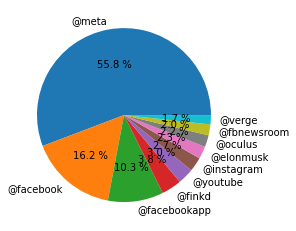

In [9]:
# EL primer analicis que podemos hacer es analizar la frecuencia de palabras.
from nltk.probability import FreqDist 
import matplotlib.pyplot as plt
from heapq import nlargest

plt.rcParams['font.size'] = 10
# Obtener frecuencia de cada término
fdist = FreqDist(menciones)

TenHighest = nlargest(10, fdist, key = fdist.get)
usuarios = []#list(fdist.keys()) 
frecuencias = []#list(fdist.values())

for val in TenHighest:
    usuarios.append(val)
    frecuencias.append(fdist.get(val))

plt.pie(frecuencias, labels=usuarios, autopct="%0.1f %%")
plt.show()

# Nube de palabras con los adjetivos 
## Quitamos menciones porque las etiqueta como adjetivos

In [10]:
import re
i=0
list_aux=[]

for text in df['tokenized_text']:
    j=0
    for palabra in text:
        if(re.search("^@+",palabra)):
            j=j+1
        else:
            list_aux.append(palabra)
            j=j+1
    df['tokenized_text'][i]=list_aux
    list_aux=[]
    i=i+1
df

,id,text,tokenized_text
0,1454236343534592000,"@elonmusk @nichegamer ""𝐌𝐄𝐓𝐀"" @facebookapp , 𝐓𝐡...","[𝐌𝐄𝐓𝐀, 𝐓𝐡𝐨𝐮𝐠𝐡𝐭, 𝐨𝐟, 𝐚𝐧, 𝐚𝐛𝐛𝐫𝐞𝐯𝐢𝐚𝐭𝐢𝐨𝐧, 𝐇𝐈𝐍𝐃𝐈, 𝐌..."
1,1454235492468379650,"With Facebook new name (Meta), FAANG will be M...","[Facebook, new, name, Meta, FAANG, MANGA, face..."
2,1454235433538183168,Rebranding from #Facebook to #Meta is not an a...,"[Rebranding, Facebook, Meta, attempt, remove, ..."
3,1454235338029899779,Dad Joke OTD:\n\nI told my son Facebook is cha...,"[Dad, Joke, OTD, told, son, Facebook, changing..."
4,1454235103186628610,@MissionToZyxx Nermit Bundaloy‘s love for virt...,"[Nermit, Bundaloy, love, virtual, office, life..."
...,...,...,...
5088,1453952982630887426,"#Facebook Inc to rebrand as #Meta, a name chan...","[Facebook, Inc, rebrand, Meta, name, change, c..."
5089,1453952889865392129,"Facebook is no more. Last night, during Facebo...","[Facebook, Last, night, Facebook, Connect, 202..."
5090,1453952874321367040,#BREAKING 1.5 Billion #Facebook User's Data ar...,"[BREAKING, 1.5, Billion, Facebook, User's, Dat..."
5091,1453952857590300681,#Facebook #new #name #meta\n change Facebook n...,"[Facebook, new, name, meta, change, Facebook, ..."


# Etiquetado pos

In [11]:
import nltk
#nltk.download('averaged_perceptron_tagger')
#nltk.download('tagsets')
df['pos_tokenized_text']=df['tokenized_text']

i=0
for text in df['tokenized_text']:    
    df['pos_tokenized_text'][i] = nltk.pos_tag(text)
    i=i+1
df

,id,text,tokenized_text,pos_tokenized_text
0,1454236343534592000,"@elonmusk @nichegamer ""𝐌𝐄𝐓𝐀"" @facebookapp , 𝐓𝐡...","[𝐌𝐄𝐓𝐀, 𝐓𝐡𝐨𝐮𝐠𝐡𝐭, 𝐨𝐟, 𝐚𝐧, 𝐚𝐛𝐛𝐫𝐞𝐯𝐢𝐚𝐭𝐢𝐨𝐧, 𝐇𝐈𝐍𝐃𝐈, 𝐌...","[(𝐌𝐄𝐓𝐀, JJ), (𝐓𝐡𝐨𝐮𝐠𝐡𝐭, NNP), (𝐨𝐟, NNP), (𝐚𝐧, N..."
1,1454235492468379650,"With Facebook new name (Meta), FAANG will be M...","[Facebook, new, name, Meta, FAANG, MANGA, face...","[(Facebook, NNP), (new, JJ), (name, NN), (Meta..."
2,1454235433538183168,Rebranding from #Facebook to #Meta is not an a...,"[Rebranding, Facebook, Meta, attempt, remove, ...","[(Rebranding, VBG), (Facebook, NNP), (Meta, NN..."
3,1454235338029899779,Dad Joke OTD:\n\nI told my son Facebook is cha...,"[Dad, Joke, OTD, told, son, Facebook, changing...","[(Dad, NNP), (Joke, NNP), (OTD, NNP), (told, V..."
4,1454235103186628610,@MissionToZyxx Nermit Bundaloy‘s love for virt...,"[Nermit, Bundaloy, love, virtual, office, life...","[(Nermit, NNP), (Bundaloy, NNP), (love, VBP), ..."
...,...,...,...,...
5088,1453952982630887426,"#Facebook Inc to rebrand as #Meta, a name chan...","[Facebook, Inc, rebrand, Meta, name, change, c...","[(Facebook, NNP), (Inc, NNP), (rebrand, NN), (..."
5089,1453952889865392129,"Facebook is no more. Last night, during Facebo...","[Facebook, Last, night, Facebook, Connect, 202...","[(Facebook, NNP), (Last, JJ), (night, NN), (Fa..."
5090,1453952874321367040,#BREAKING 1.5 Billion #Facebook User's Data ar...,"[BREAKING, 1.5, Billion, Facebook, User's, Dat...","[(BREAKING, $), (1.5, CD), (Billion, NNP), (Fa..."
5091,1453952857590300681,#Facebook #new #name #meta\n change Facebook n...,"[Facebook, new, name, meta, change, Facebook, ...","[(Facebook, NNP), (new, JJ), (name, NN), (meta..."


In [12]:
from nltk.probability import FreqDist

tokenized_list = df.explode('pos_tokenized_text')

df['pos_tokenized_text']

word_type = []
for text in df['pos_tokenized_text']:
    for element in text:
        word_type.append(list(element))

print(word_type)

[['𝐌𝐄𝐓𝐀', 'JJ'], ['𝐓𝐡𝐨𝐮𝐠𝐡𝐭', 'NNP'], ['𝐨𝐟', 'NNP'], ['𝐚𝐧', 'NNP'], ['𝐚𝐛𝐛𝐫𝐞𝐯𝐢𝐚𝐭𝐢𝐨𝐧', 'NNP'], ['𝐇𝐈𝐍𝐃𝐈', 'NNP'], ['𝐌𝐞𝐫𝐢', 'NNP'], ['𝐄𝐧𝐠𝐢𝐧𝐞𝐞𝐫𝐢𝐧𝐠', 'NNP'], ['𝐓𝐞𝐫𝐚', 'NNP'], ['𝐃𝐚𝐭𝐚', 'NNP'], ['𝐄𝐍𝐆𝐋𝐈𝐒𝐇', 'NNP'], ['𝐌𝐲', 'NNP'], ['𝐄𝐧𝐠𝐢𝐧𝐞𝐞𝐫𝐢𝐧𝐠', 'NNP'], ['𝐘𝐨𝐮𝐫', 'NNP'], ['𝐃𝐚𝐭𝐚', 'NNP'], ['Facebook', 'NNP'], ['Meta', 'NNP'], ['ElonMusk', 'NNP'], ['Elon', 'NNP'], ['Facebook', 'NNP'], ['new', 'JJ'], ['name', 'NN'], ['Meta', 'NNP'], ['FAANG', 'NNP'], ['MANGA', 'NNP'], ['facebook', 'NN'], ['meta', 'NN'], ['faang', 'NN'], ['Rebranding', 'VBG'], ['Facebook', 'NNP'], ['Meta', 'NNP'], ['attempt', 'NN'], ['remove', 'VB'], ['negative', 'JJ'], ['associations', 'NNS'], ['around', 'IN'], ['Facebook', 'NNP'], ['internet', 'NN'], ["We've", 'NNP'], ['already', 'RB'], ['paid', 'VBD'], ['Google', 'NNP'], ['bunch', 'NN'], ['money', 'NN'], ['us', 'PRP'], ['Dad', 'NNP'], ['Joke', 'NNP'], ['OTD', 'NNP'], ['told', 'VBD'], ['son', 'NN'], ['Facebook', 'NNP'], ['changing', 'VBG'], ['name', 'NN'], ['Meta', 'NNP'], ['asked'

In [13]:
#N* -> N
#J* -> A
#V* -> v
#R* -> R

j=0
for element in word_type:
    if element[1][0] == "J":     
        element[1]="a"    
        word_type[j]=element
        j=j+1
    else:
        word_type.remove(element)

print("---------------------------------------------------------------------")
word_type

---------------------------------------------------------------------


[['𝐌𝐄𝐓𝐀', 'a'],
 ['negative', 'a'],
 ['oddy', 'a'],
 ['unforgivable', 'a'],
 ['mistake', 'a'],
 ['virtual', 'a'],
 ['leap', 'a'],
 ['clear', 'a'],
 ['mark', 'a'],
 ['busy', 'a'],
 ['deadname', 'a'],
 ['Federal', 'a'],
 ['Virtual', 'a'],
 ['massive', 'a'],
 ["can't", 'a'],
 ['bullish', 'a'],
 ['forgot', 'a'],
 ['lesson', 'a'],
 ['social', 'a'],
 ['dead', 'a'],
 ['biggest', 'a'],
 ['first', 'a'],
 ['levity', 'a'],
 ['self-proclaimed', 'a'],
 ['new', 'a'],
 ['potential', 'a'],
 ['important', 'a'],
 ['flaccid', 'a'],
 ['terrible', 'a'],
 ['so-called', 'a'],
 ['hate', 'a'],
 ['great', 'a'],
 ['read', 'a'],
 ['podcast', 'a'],
 ['nyc', 'a'],
 ['confused', 'a'],
 ['precious', 'a'],
 ['explain', 'a'],
 ['surprised', 'a'],
 ['lame', 'a'],
 ['info', 'a'],
 ['visual', 'a'],
 ['poor', 'a'],
 ['early', 'a'],
 ['pandemic', 'a'],
 ['worried', 'a'],
 ['migraine', 'a'],
 ['new', 'a'],
 ['German', 'a'],
 ['white', 'a'],
 ['relevant', 'a'],
 ['read', 'a'],
 ['giant', 'a'],
 ['social', 'a'],
 ['next', 'a']

# Lematizacion y Nube de Palabras

In [14]:
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud # esta libreria es la vamos a utilzar para hacer una nube de palabras grafica y
nltk.download('wordnet')

# Importar Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = []
for word, simbol in word_type:
    lemmatized.append(wordnet_lemmatizer.lemmatize(word, simbol))
    if len(lemmatized) > 1000:
        break
lemmatized
text = " ".join(lemmatized)

print(text)
wordcloud = WordCloud(max_words=25, background_color="white").generate(text)

[nltk_data] Downloading package wordnet to /home/eduardo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


𝐌𝐄𝐓𝐀 negative oddy unforgivable mistake virtual leap clear mark busy deadname Federal Virtual massive can't bullish forgot lesson social dead big first levity self-proclaimed new potential important flaccid terrible so-called hate great read podcast nyc confused precious explain surprised lame info visual poor early pandemic worried migraine new German white relevant read giant social next lie new interested free metaverse new virtual recent new new scary invasive enough early due meta agree hatespeech stuck unplug shite dead new ya'll fine crazy daily next new open social rotten exploitative intrusive immoral labaxday shirkaddii infographic good positive pretty sure so-called additional palestine funny familiar new new elastic new new welcome Official new hidden huge dead female convert virtual new uiux lead likely new early opposite smokescreen detract paddle last new augmented bad daily facebook minimalist dead dead photo difficult talent fresh stupid good Canadian bad bad lean rece

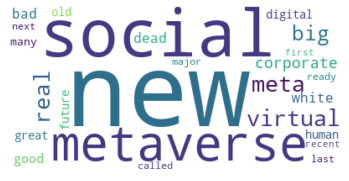

In [15]:
# Mostrar gráfico
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

# Analisis de sentimiento

In [26]:
import nltk
nltk.download('vader_lexicon')
#conda install -c conda-forge vadersentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/eduardo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
df['pos_tokenized_text']

word_type = []
for text in df['pos_tokenized_text']:
    for element in text:
        word_type.append(list(element))

#N* -> N
#J* -> A
#V* -> v
#R* -> R

j=0
for element in word_type:
    if element[1][0] == "J":     
        element[1]="a"    
        word_type[j]=element
        j=j+1
    elif element[1][0] == "V":     
        element[1]="v"    
        word_type[j]=element
        j=j+1
    elif element[1][0] == "R":     
        element[1]="r"    
        word_type[j]=element
        j=j+1
    
    else:
        word_type.remove(element)

print("---------------------------------------------------------------------")
word_type

---------------------------------------------------------------------


[['𝐌𝐄𝐓𝐀', 'a'],
 ['negative', 'a'],
 ['paid', 'v'],
 ['changing', 'v'],
 ['asked', 'v'],
 ["what's", 'a'],
 ['love', 'v'],
 ['virtual', 'a'],
 ['suddenly', 'r'],
 ['seems', 'v'],
 ['oddy', 'a'],
 ['changed', 'v'],
 ['never', 'r'],
 ['change', 'v'],
 ['branded', 'v'],
 ['endcorruptionnow', 'v'],
 ['made', 'v'],
 ['unforgivable', 'a'],
 ['mistake', 'a'],
 ['wants', 'v'],
 ['hero', 'a'],
 ['going', 'v'],
 ['better', 'r'],
 ['tired', 'v'],
 ['seeing', 'v'],
 ['virtual', 'a'],
 ['holding', 'v'],
 ['shared', 'v'],
 ['promised', 'v'],
 ['helped', 'v'],
 ['break', 'v'],
 ['refer', 'v'],
 ['starting', 'v'],
 ['top', 'a'],
 ['facebook', 'v'],
 ['meta', 'a'],
 ['meta', 'v'],
 ['invited', 'v'],
 ['leap', 'a'],
 ['yet', 'r'],
 ['given', 'v'],
 ['clear', 'a'],
 ['made', 'v'],
 ['new', 'a'],
 ['changed', 'v'],
 ['join', 'v'],
 ['mark', 'a'],
 ['sun', 'v'],
 ['make', 'v'],
 ['maybe', 'r'],
 ["they'll", 'v'],
 ['oops', 'v'],
 ['loose', 'a'],
 ['busy', 'a'],
 ['deadname', 'a'],
 ['first', 'r'],
 ['verif

In [28]:
# Importar Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = []
for word, simbol in word_type:
    lemmatized.append(wordnet_lemmatizer.lemmatize(word, simbol))
    if len(lemmatized) > 1000:
        break
lemmatized
text = " ".join(lemmatized)

In [29]:
# Instanciar Analizador
sentiment_analyzer = SentimentIntensityAnalyzer()
# Analizar polaridad de la oración
analisis = sentiment_analyzer.polarity_scores(text) 
print("->RESULTADO SOBRE LOS ADJETIVOS:\n",analisis)   

->RESULTADO SOBRE LOS ADJETIVOS:
 {'neg': 0.154, 'neu': 0.654, 'pos': 0.193, 'compound': 0.9891}


In [33]:
df_analisis=df[['text']]
df_analisis["negative"] = ""
df_analisis["neutral"] = ""
df_analisis["positive"] = ""
df_analisis["result"] = ""

for index, row in df_analisis.iterrows():
    #Analizar cada review
    analisis = sentiment_analyzer.polarity_scores(row['text'])
    row["negative"] = analisis["neg"]
    row["neutral"] = analisis["neu"]
    row["positive"] = analisis["pos"]
    # Evaluar que valores se considerarán positivo o negativo
    
 

    if analisis['compound'] > 0.6 :
        row["result"] = "Positive"
    elif analisis['compound'] <  0.6:
        row["result"] = "Negative"
    else :
        row["result"] = "Neutral"
  
df_analisis
df_analisis.to_csv('analisis') 

<ipython-input-33-1c9770fe2cc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analisis["negative"] = ""
<ipython-input-33-1c9770fe2cc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analisis["neutral"] = ""


# Conclusion:
    Pudimos notar que los usuarios mas mencionados son los que tienen relacion con la empresa facebook (meta,facebook, facebookapp).
    Con respecto a la nube de palabras de adjetivos, pudimos notar que la mayoria de palabras tienen relacion con la tematica propuesta (nuevo, virtual, social, etc)
    Y por ultimo con el resultado del analisis de sentimientos, pudimos notar que las postura con respecto al tema es neurtara, lo cual tiene sentido ya que no es una tematica la cual genere sentimientos negativos o positivos en las personas.